In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales', axis = 1)

In [5]:
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
# Convert the three features into polynomial features with a degree of 2. 
# Due to the interaction terms, this will give 9 terms.
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)  # include_bias = False, since we know the sales is 0 when spending is 0.

In [12]:
poly_features = polynomial_converter.fit_transform(X)

In [14]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [15]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [16]:
poly_features[0][0:3]   # These are the original features


array([230.1,  37.8,  69.2])

In [17]:
np.square([230.1,  37.8,  69.2])

array([52946.01,  1428.84,  4788.64])

In [21]:
display(X.shape)
display(poly_features.shape)     # As expected, still 200 rows, and 9 features per row.

(200, 3)

(200, 9)

In [22]:
display (X.iloc[0])
display (poly_features[0][0:3])

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

array([230.1,  37.8,  69.2])

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [29]:
# And now we just treat the problem as a regular linear regression problem with 9 features

In [30]:
from sklearn.linear_model import LinearRegression

In [34]:
# Now fit model to training data
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Time to evaluate on the test set. 

In [37]:
# Predict the outputs for the test data

test_predictions = model.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [42]:
MAE = mean_absolute_error(test_predictions, y_test)
MSE = mean_squared_error (test_predictions, y_test)
RMSE = np.sqrt(MSE)

In [43]:
MAE, MSE, RMSE

(0.4896798044803488, 0.44175055104033534, 0.6646431757268974)

In [44]:
# So second-degree polynomial regression is more accurate than the linear one.

In [45]:
# How can we choose the most optimal degree that minimises error? 
# We will compute the training_error and test_error for all degrees up to, say, 10. 
# training_error will always go down with increasing polynomial degree.
# But test_error will go down up to a point, before blowing up.

In [49]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,11):
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    
    train_MSE = mean_squared_error (train_pred, y_train)
    train_RMSE = np.sqrt(train_MSE)

    test_MSE = mean_squared_error(test_pred, y_test)
    test_RMSE = np.sqrt(test_MSE)

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)


print (list(zip (train_rmse_errors, test_rmse_errors)))
    
    
    
    

[(1.7345941243293763, 1.5161519375993884), (0.587957408529223, 0.6646431757268974), (0.43393443569020673, 0.5803286825163759), (0.35170836883993534, 0.5077742631180222), (0.2509342963168562, 2.575820709711998), (0.20133513038009845, 4.417531343659344), (5.429519690630219, 1368.3537494947786), (0.20829323347473921, 4031.580690396981), (0.17705794329531716, 99797.38688330933), (0.20448222897946802, 1285159.949221398)]


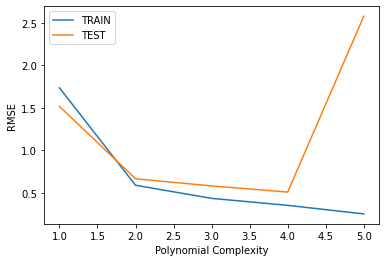

In [53]:
plt.plot(range(1,6),train_rmse_errors[0:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[0:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [54]:
# So it seems polynomial degree of 3 would be ideal.

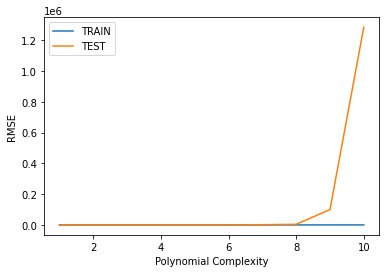

In [56]:
plt.plot(range(1,11),train_rmse_errors,label='TRAIN')
plt.plot(range(1,11),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

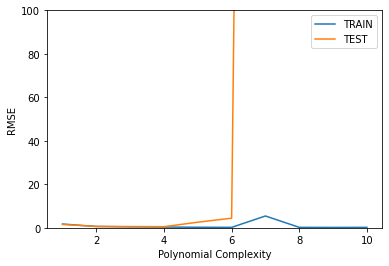

In [59]:
plt.plot(range(1,11),train_rmse_errors,label='TRAIN')
plt.plot(range(1,11),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

In [60]:
# Having chosen d = 3 as the most optimal polynomial degree, we train the model one final time. 

final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)
final_poly_features = final_poly_converter.fit_transform(X)
final_model = LinearRegression(fit_intercept=True)
final_model.fit(final_poly_features, y)





LinearRegression()

In [64]:
# Save poly_converter and model

from joblib import dump, load
dump(final_model, 'sales_poly_model.joblib')
dump (final_poly_converter, 'poly_converter.joblib')

['poly_converter.joblib']

In [65]:
# Deployment and Predictions

In [66]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

campaign = [[149,22,12]]

campaign_poly_features = loaded_poly.transform(campaign)            # Note that we only transform. No need to fit, since we've already done that before saving the converter.
campaign_output = loaded_model.predict(campaign_poly_features)

In [67]:
campaign_output

array([14.64501014])